# Data set description
***This is a dataset for amazon sales in india for clothes for the year 2022***

### main columns description
**Category:**	Type of product. (String)<br>
**Size:**	Size of the product. (String)<br>
**Date:**	Date of the sale. (Date)<br>
**Status:**	Status of the shipping. (String)<br>
**Fulfilment:**	Who sold it, amazon or a merchant on amazon. (String)<br>
**Style:**	Style of the product. (String)<br>
**SKU:**	Stock Keeping Unit. (String)<br>
**ASIN:**	Amazon Standard Identification Number. (String)<br>
**Courier Status:** 	Status of the courier. (String)<br>
**Qty:**	Quantity of the product. (Integer)<br>
**Amount:** 	Amount of the sale. (Float)<br>
**B2B:**	Business to business sale. (Boolean)<br>
**Currency:**	The currency used for the sale. (String)<br>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns

In [3]:
df = pd.read_csv("amazon_sale_report.csv")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\3200021347.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("amazon_sale_report.csv")


# Data exploration

In [4]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

***cleaning notes***
<br>- change the data type in "date" to datetime

In [6]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [7]:
df["Sales Channel "].value_counts()

Amazon.in     128851
Non-Amazon       124
Name: Sales Channel , dtype: int64

***Cleaning note***
<br>-Since this is supposed to be an amazon dataset so i will remove the rows wich are not amzon, then remove the whole column
<br>- I will remove the "index column"

In [8]:
df = df[df["Sales Channel "] == "Amazon.in"]

In [9]:
df["Sales Channel "].value_counts()

Amazon.in    128851
Name: Sales Channel , dtype: int64

In [10]:
df["Status"].value_counts()

Shipped                          77689
Shipped - Delivered to Buyer     28769
Cancelled                        18331
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
                                 ...  
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, Length: 12, dtype: int64

**Cleaning notes**
<br>- "Shipped", "Shipped - Delivered to Buyer", "Shipped - Picked Up", "Shipped - Out for Delivery", and "Shipping", i will change them to just "delivered"
<br>- "Cancelled" i will keep it the same
<br>- "Shipped - Returned to Seller", "Shipped - Returning to Seller", and "Shipped - Rejected by Buyer" i will change them to "returned"
<br>- "pending" and "Pending - Waiting for Pick Up" i will make them "pending"
<br>- "lost in transit" i will make it "lost"
<br>- "Damaged" I will remove it becouse it's just one value

<br>**Another note**
<br>For the "Shipped - Picked Up" values this means that it didn't reach the buyer yet, and it's not confirmed wether the buyer accepted it or not, but i will assume that it has been accepted, to be able to continue my analysis

In [11]:
df["Fulfilment"].value_counts()

Amazon      89574
Merchant    39277
Name: Fulfilment, dtype: int64

In [12]:
df["ship-service-level"].value_counts()

Expedited    88615
Standard     40236
Name: ship-service-level, dtype: int64

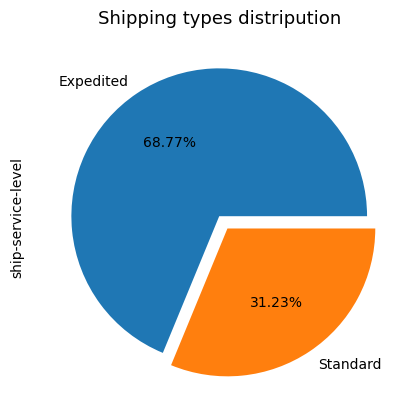

In [13]:
df["ship-service-level"].value_counts().plot(kind = "pie", autopct = "%1.2f%%", explode = [0, 0.1])
plt.title("Shipping types distripution", size = 13);

In [14]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [15]:
df["Courier Status"].value_counts()

Shipped      109487
Unshipped      6557
Cancelled      5935
Name: Courier Status, dtype: int64

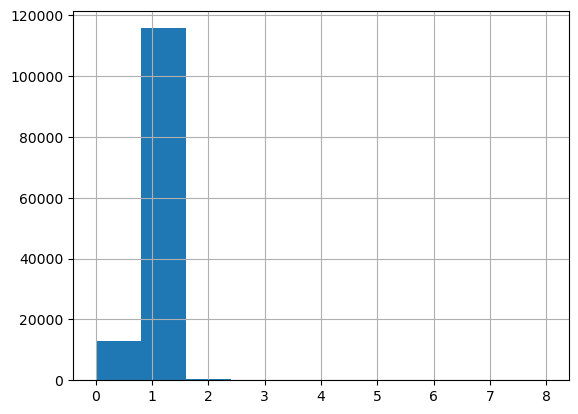

In [16]:
df["Qty"].hist();

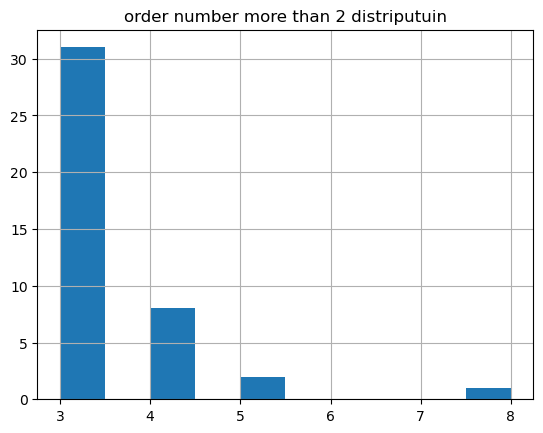

In [17]:
df.query("Qty >2")["Qty"].hist()
plt.title("order number more than 2 distriputuin");

In [18]:
df["currency"].value_counts()

INR    121180
Name: currency, dtype: int64

***since all of the sales are in india so the cuureny is the Indian Rupee***

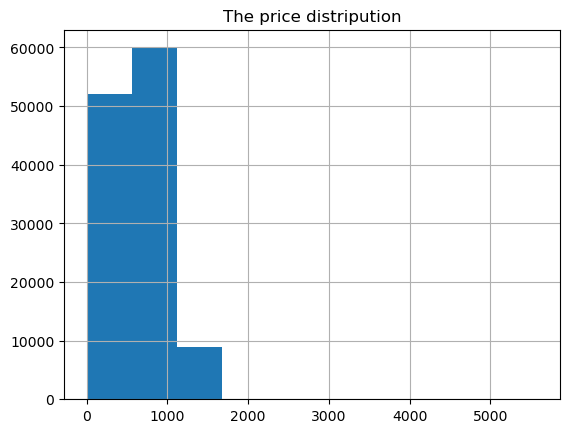

In [19]:
df["Amount"].hist()
plt.title("The price distripution");

In [20]:
df["ship-country"].value_counts()

IN    128818
Name: ship-country, dtype: int64

***Cleaning note***
<br>- all the products are shipped from india so i will just delete this column

In [21]:
df["fulfilled-by"].value_counts()

Easy Ship    39277
Name: fulfilled-by, dtype: int64

In [22]:
df["Category"].value_counts()

Set              50224
kurta            49826
Western Dress    15496
Top              10618
Ethnic Dress      1159
Blouse             922
Bottom             439
Saree              164
Dupatta              3
Name: Category, dtype: int64

***Cleaning Notes***
<br>I will delete "index", "Order ID", "Style", "SKU", "ASIN", "Courier Status", "currency", "Ship postal code", "Ship country", "promotion ids", "unames", "fuffilled-by"

In [23]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [24]:
#i wil delete the columns before moving on
df.drop(["index", "Order ID", "Style", "SKU", "ASIN", "Courier Status", "currency", "ship-postal-code", "ship-country", "promotion-ids",
        "fulfilled-by", "Unnamed: 22", "Sales Channel "], axis = 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\3631191549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["index", "Order ID", "Style", "SKU", "ASIN", "Courier Status", "currency", "ship-postal-code", "ship-country", "promotion-ids",


In [25]:
df

,Date,Status,Fulfilment,ship-service-level,Category,Size,Qty,Amount,ship-city,ship-state,B2B
0,04-30-22,Cancelled,Merchant,Standard,Set,S,0,647.62,MUMBAI,MAHARASHTRA,False
1,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False
2,04-30-22,Shipped,Amazon,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True
3,04-30-22,Cancelled,Merchant,Standard,Western Dress,L,0,753.33,PUDUCHERRY,PUDUCHERRY,False
4,04-30-22,Shipped,Amazon,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...
128970,05-31-22,Shipped,Amazon,Expedited,kurta,XL,1,517.00,HYDERABAD,TELANGANA,False
128971,05-31-22,Shipped,Amazon,Expedited,Set,M,1,999.00,GURUGRAM,HARYANA,False
128972,05-31-22,Shipped,Amazon,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False
128973,05-31-22,Shipped,Amazon,Expedited,Set,XS,1,1199.00,Halol,Gujarat,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128851 entries, 0 to 128974
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                128851 non-null  object 
 1   Status              128851 non-null  object 
 2   Fulfilment          128851 non-null  object 
 3   ship-service-level  128851 non-null  object 
 4   Category            128851 non-null  object 
 5   Size                128851 non-null  object 
 6   Qty                 128851 non-null  int64  
 7   Amount              121180 non-null  float64
 8   ship-city           128818 non-null  object 
 9   ship-state          128818 non-null  object 
 10  B2B                 128851 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 10.9+ MB


In [27]:
df.duplicated().sum()

4488

In [28]:
df.drop_duplicates(inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\3424306917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [29]:
df.duplicated().sum()

0

In [30]:
df.isnull().sum()

Date                     0
Status                   0
Fulfilment               0
ship-service-level       0
Category                 0
                      ... 
Qty                      0
Amount                6895
ship-city               32
ship-state              32
B2B                      0
Length: 11, dtype: int64

In [31]:
#I want to see the rows that has null values in the amount since the amount is the most important thing
df[df["Amount"].isnull()]

,Date,Status,Fulfilment,ship-service-level,Category,Size,Qty,Amount,ship-city,ship-state,B2B
8,04-30-22,Cancelled,Amazon,Expedited,Set,3XL,0,NaN,HYDERABAD,TELANGANA,False
29,04-30-22,Cancelled,Merchant,Standard,kurta,3XL,0,NaN,GUWAHATI,ASSAM,False
65,04-30-22,Cancelled,Amazon,Expedited,kurta,XXL,0,NaN,Dahod,Gujarat,False
84,04-30-22,Cancelled,Amazon,Expedited,kurta,M,0,NaN,HYDERABAD,TELANGANA,False
95,04-30-22,Cancelled,Amazon,Expedited,kurta,L,0,NaN,PUNE,MAHARASHTRA,False
...,...,...,...,...,...,...,...,...,...,...,...
128902,05-31-22,Cancelled,Amazon,Expedited,Western Dress,L,0,NaN,ANANTAPUR,ANDHRA PRADESH,False
128903,05-31-22,Cancelled,Amazon,Expedited,kurta,M,0,NaN,ANANTAPUR,ANDHRA PRADESH,False
128907,05-31-22,Cancelled,Amazon,Expedited,Set,3XL,0,NaN,GREATER NOIDA,UTTAR PRADESH,False
128958,05-31-22,Cancelled,Amazon,Expedited,Set,L,0,NaN,Bengaluru,KARNATAKA,False


In [32]:
len(df[df["Status"] == "Cancelled"])

16941

In [33]:
df[df["Amount"].isnull()]["Status"].value_counts()

Cancelled                       6796
Shipped                           86
Shipped - Delivered to Buyer       8
Shipped - Returned to Seller       3
Pending                            2
Name: Status, dtype: int64

It seems that most of the null values in the "Amount" column are for orders that have been canceld, and if i just deleted these rows i will affects the number of cancelled values in this dataset, ***So i will fill the null values with the average***

In [34]:
amount_mean = np.mean(df["Amount"])
df["Amount"].fillna(amount_mean, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\3623162978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Amount"].fillna(amount_mean, inplace = True)


In [35]:
df.isnull().sum()

Date                   0
Status                 0
Fulfilment             0
ship-service-level     0
Category               0
                      ..
Qty                    0
Amount                 0
ship-city             32
ship-state            32
B2B                    0
Length: 11, dtype: int64

Now we have replaced all the null values "in the amount with the average"

In [36]:
df[df["ship-city"].isnull()]

,Date,Status,Fulfilment,ship-service-level,Category,Size,Qty,Amount,ship-city,ship-state,B2B
1871,04-29-22,Shipped,Amazon,Expedited,Top,L,1,493.0,NaN,NaN,False
1872,04-29-22,Shipped,Amazon,Expedited,kurta,L,1,458.0,NaN,NaN,False
8752,04-25-22,Shipped,Amazon,Expedited,kurta,M,1,432.0,NaN,NaN,False
11215,04-23-22,Shipped,Amazon,Expedited,Set,S,1,654.0,NaN,NaN,False
13252,04-22-22,Cancelled,Merchant,Standard,kurta,S,0,380.0,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
124357,06-04-22,Shipped,Amazon,Expedited,kurta,L,1,486.0,NaN,NaN,False
124358,06-04-22,Shipped,Amazon,Expedited,Set,L,1,874.0,NaN,NaN,False
124359,06-04-22,Shipped,Amazon,Expedited,Set,L,1,832.0,NaN,NaN,False
125385,06-03-22,Shipped,Amazon,Expedited,kurta,L,1,376.0,NaN,NaN,False


In [37]:
#I will drop these rows
df.dropna(inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\2186172192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [38]:
df.isnull().sum()

Date                  0
Status                0
Fulfilment            0
ship-service-level    0
Category              0
                     ..
Qty                   0
Amount                0
ship-city             0
ship-state            0
B2B                   0
Length: 11, dtype: int64

In [39]:
df.describe()

,Qty,Amount
count,124331.000000,124331.000000
mean,0.908896,649.763664
std,0.302049,274.330628
min,0.000000,0.000000
25%,1.000000,459.000000
50%,1.000000,634.290000
75%,1.000000,771.000000
max,8.000000,5584.000000


**There are values that make no since like 0 in both columns**

In [40]:
zero_df = df[df["Qty"] == 0]
zero_df

,Date,Status,Fulfilment,ship-service-level,Category,Size,Qty,Amount,ship-city,ship-state,B2B
0,04-30-22,Cancelled,Merchant,Standard,Set,S,0,647.620000,MUMBAI,MAHARASHTRA,False
3,04-30-22,Cancelled,Merchant,Standard,Western Dress,L,0,753.330000,PUDUCHERRY,PUDUCHERRY,False
8,04-30-22,Cancelled,Amazon,Expedited,Set,3XL,0,649.750067,HYDERABAD,TELANGANA,False
23,04-30-22,Cancelled,Merchant,Standard,Set,M,0,570.480000,pune,MAHARASHTRA,False
29,04-30-22,Cancelled,Merchant,Standard,kurta,3XL,0,649.750067,GUWAHATI,ASSAM,False
...,...,...,...,...,...,...,...,...,...,...,...
128902,05-31-22,Cancelled,Amazon,Expedited,Western Dress,L,0,649.750067,ANANTAPUR,ANDHRA PRADESH,False
128903,05-31-22,Cancelled,Amazon,Expedited,kurta,M,0,649.750067,ANANTAPUR,ANDHRA PRADESH,False
128907,05-31-22,Cancelled,Amazon,Expedited,Set,3XL,0,649.750067,GREATER NOIDA,UTTAR PRADESH,False
128958,05-31-22,Cancelled,Amazon,Expedited,Set,L,0,649.750067,Bengaluru,KARNATAKA,False


In [41]:
zero_df["Status"].value_counts()

Cancelled                       11664
Shipped                            86
Shipped - Delivered to Buyer        8
Shipped - Returned to Seller        3
Pending                             2
Name: Status, dtype: int64

There are alot of rows with "Qty" values = 0, and they represnt most of the rows with "Cancelled" in "Status", so i can't delete these rows, so i will replace 0 with the average value which is 1

***limitation to the study***
<br> there are alot of missing values that i had to replace 

In [42]:
df["Qty"].replace(0, 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\2176274595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Qty"].replace(0, 1, inplace = True)


In [43]:
df.describe()

,Qty,Amount
count,124331.000000,124331.000000
mean,1.003507,649.763664
std,0.070072,274.330628
min,1.000000,0.000000
25%,1.000000,459.000000
50%,1.000000,634.290000
75%,1.000000,771.000000
max,8.000000,5584.000000


In [44]:
zero_df = df[df["Amount"] == 0]
zero_df

,Date,Status,Fulfilment,ship-service-level,Category,Size,Qty,Amount,ship-city,ship-state,B2B
212,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,kurta,XXL,1,0.0,BHUBANESWAR,ODISHA,False
374,04-30-22,Shipped - Returned to Seller,Merchant,Standard,Western Dress,M,1,0.0,NEW DELHI,DELHI,False
385,04-30-22,Shipped,Amazon,Standard,kurta,L,1,0.0,DARJEELING,WEST BENGAL,False
388,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,Western Dress,XS,1,0.0,LUDHIANA,PUNJAB,False
392,04-30-22,Shipped,Amazon,Expedited,Set,L,1,0.0,MUMBAI,MAHARASHTRA,False
...,...,...,...,...,...,...,...,...,...,...,...
128550,06-01-22,Shipped,Amazon,Expedited,Set,L,1,0.0,CHENNAI,TAMIL NADU,False
128612,06-01-22,Shipped - Delivered to Buyer,Merchant,Standard,Bottom,M,1,0.0,INDORE,MADHYA PRADESH,False
128685,06-01-22,Shipped,Amazon,Standard,Western Dress,M,1,0.0,MOHALI,PUNJAB,False
128804,06-01-22,Shipped - Delivered to Buyer,Merchant,Standard,Set,XL,1,0.0,VADAKARA,KERALA,False


I will deal with them as NaN values and replace them with the average

In [45]:
df["Amount"].replace(0, amount_mean, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\631101926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Amount"].replace(0, amount_mean, inplace = True)


In [46]:
df.describe()

,Qty,Amount
count,124331.000000,124331.000000
mean,1.003507,661.809524
std,0.070072,259.393523
min,1.000000,199.000000
25%,1.000000,469.000000
50%,1.000000,641.000000
75%,1.000000,771.000000
max,8.000000,5584.000000


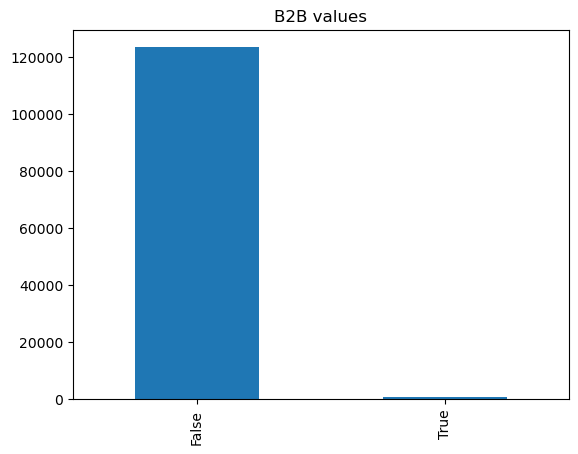

In [47]:
df["B2B"].value_counts().plot(kind = "bar")
plt.title("B2B values");

## Cleaning
I made some cleaning steps in the last section, but they where essintial for my exploration, put here i will do most of the cleaning work

First thing i want to change some names for some columns

In [48]:
df.columns

Index(['Date', 'Status', 'Fulfilment', 'ship-service-level', 'Category',
       'Size', 'Qty', 'Amount', 'ship-city', 'ship-state', 'B2B'],
      dtype='object')

In [49]:
df = df.rename(columns = {"Status": "shipping_status",
                          "Fulfilment": "fulfilment",
                          "ship-service-level": "shipping_type",
                          "Category": "category",
                          "Size": "size",
                          "Qty": "items_number",
                         "Amount": "amount",
                         "ship-city": "city",
                         "ship-state": "state"})

In [50]:
df = df.rename(columns = {"Date":"date"})

In [51]:
# I will change the data type in this column to time
df["date"] = pd.to_datetime(df["date"])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124331 entries, 0 to 128974
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             124331 non-null  datetime64[ns]
 1   shipping_status  124331 non-null  object        
 2   fulfilment       124331 non-null  object        
 3   shipping_type    124331 non-null  object        
 4   category         124331 non-null  object        
 5   size             124331 non-null  object        
 6   items_number     124331 non-null  int64         
 7   amount           124331 non-null  float64       
 8   city             124331 non-null  object        
 9   state            124331 non-null  object        
 10  B2B              124331 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 10.6+ MB


In [53]:
# I will add a new column with the year of the sale
df["year"] = df["date"].dt.year

In [54]:
df.head(2)

,date,shipping_status,fulfilment,shipping_type,category,size,items_number,amount,city,state,B2B,year
0,2022-04-30,Cancelled,Merchant,Standard,Set,S,1,647.62,MUMBAI,MAHARASHTRA,False,2022
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False,2022


In [55]:
df["year"].value_counts()

2022    124331
Name: year, dtype: int64

all the values are the year 2022 so i will delete this column

In [56]:
df.drop(["year"], axis = 1, inplace = True)

In [57]:
#I will add a new column with the month
df["month"] = df["date"].dt.month

In [58]:
df["month"].value_counts()

4    47193
5    40478
6    36491
3      169
Name: month, dtype: int64

We have 4 months in this dataset "March", "April", "May", "June", so i will rename the vlues in the dataset

In [59]:
df["month"].replace(3, "march", inplace = True)
df["month"].replace(4, "april", inplace = True)
df["month"].replace(5, "may", inplace = True)
df["month"].replace(6, "june", inplace = True)

In [60]:
df["month"].value_counts()

april    47193
may      40478
june     36491
march      169
Name: month, dtype: int64

In [61]:
# I will add a new column with the day
df["day"] = df["date"].dt.day_name()

In [62]:
df["day"].value_counts()

Sunday       18887
Tuesday      18205
Monday       17960
Wednesday    17875
Saturday     17814
Friday       17095
Thursday     16495
Name: day, dtype: int64

In [63]:
df

,date,shipping_status,fulfilment,shipping_type,category,size,items_number,amount,city,state,B2B,month,day
0,2022-04-30,Cancelled,Merchant,Standard,Set,S,1,647.62,MUMBAI,MAHARASHTRA,False,april,Saturday
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False,april,Saturday
2,2022-04-30,Shipped,Amazon,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,april,Saturday
3,2022-04-30,Cancelled,Merchant,Standard,Western Dress,L,1,753.33,PUDUCHERRY,PUDUCHERRY,False,april,Saturday
4,2022-04-30,Shipped,Amazon,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False,april,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,2022-05-31,Shipped,Amazon,Expedited,kurta,XL,1,517.00,HYDERABAD,TELANGANA,False,may,Tuesday
128971,2022-05-31,Shipped,Amazon,Expedited,Set,M,1,999.00,GURUGRAM,HARYANA,False,may,Tuesday
128972,2022-05-31,Shipped,Amazon,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False,may,Tuesday
128973,2022-05-31,Shipped,Amazon,Expedited,Set,XS,1,1199.00,Halol,Gujarat,False,may,Tuesday


In [64]:
# I want to change the order of the columns
df = df.iloc[:, [0, 12, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [65]:
df["shipping_status"].value_counts()

Shipped                          75215
Shipped - Delivered to Buyer     28165
Cancelled                        16934
Shipped - Returned to Seller      1942
Shipped - Picked Up                966
                                 ...  
Shipped - Returning to Seller      143
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            4
Shipped - Damaged                    1
Name: shipping_status, Length: 12, dtype: int64

<br>- "Shipped", "Shipped - Delivered to Buyer", "Shipped - Picked Up", "Shipped - Out for Delivery", i will change them to just "delivered"
<br>- "Cancelled" i will keep it the same
<br>- "Shipped - Returned to Seller", "Shipped - Returning to Seller", and "Shipped - Rejected by Buyer" i will change them to "returned"
<br>- "pending" and "Pending - Waiting for Pick Up" i will make them "pending"
<br>- "lost in transit" i will make it "lost"
<br>- "Damaged" I will remove it becouse it's just one value

In [66]:
df["shipping_status"].replace("Shipped - Delivered to Buyer", "Shipped", inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\702213546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["shipping_status"].replace("Shipped - Delivered to Buyer", "Shipped", inplace = True)


In [67]:
df["shipping_status"].replace("Shipped - Picked Up", "Shipped", inplace = True)
df["shipping_status"].replace("Shipped - Out for Delivery", "Shipped", inplace = True)
df["shipping_status"].replace("Shipped", "shipped", inplace = True)
df["shipping_status"].replace("Cancelled", "cancelled", inplace = True)
df["shipping_status"].replace("Shipped - Returned to Seller", "returned", inplace = True)
df["shipping_status"].replace("Shipped - Returning to Seller", "returned", inplace = True)
df["shipping_status"].replace("Shipped - Rejected by Buyer", "returned", inplace = True)
df["shipping_status"].replace("Pending", "pending", inplace = True)
df["shipping_status"].replace("Pending - Waiting for Pick Up", "pending", inplace = True)
df["shipping_status"].replace("Shipped - Lost in Transit", "lost", inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\3379267310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["shipping_status"].replace("Shipped - Picked Up", "Shipped", inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_5644\3379267310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["shipping_status"].replace("Shipped - Out for Delivery", "Shipped", inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_5644\3379267310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [68]:
df = df[df["shipping_status"] != "Shipped - Damaged"]

In [69]:
df["shipping_status"].value_counts()

shipped      104381
cancelled     16934
returned       2096
pending         915
lost              4
Name: shipping_status, dtype: int64

# Analysis

## 1- For the busines owner, basic statitcs
**I will make my mane varible is the catgeory ("Traditional, Set, others), and i will give him statitcs about it** 

- The size of each category
- the dominant fulfilment of each catgeory
- the highst city in each category
- the average amount of each category
- shipping_type for each category

In [70]:
df

,date,day,month,shipping_status,fulfilment,shipping_type,category,size,items_number,amount,city,state,B2B
0,2022-04-30,Saturday,april,cancelled,Merchant,Standard,Set,S,1,647.62,MUMBAI,MAHARASHTRA,False
1,2022-04-30,Saturday,april,shipped,Merchant,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False
2,2022-04-30,Saturday,april,shipped,Amazon,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True
3,2022-04-30,Saturday,april,cancelled,Merchant,Standard,Western Dress,L,1,753.33,PUDUCHERRY,PUDUCHERRY,False
4,2022-04-30,Saturday,april,shipped,Amazon,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,2022-05-31,Tuesday,may,shipped,Amazon,Expedited,kurta,XL,1,517.00,HYDERABAD,TELANGANA,False
128971,2022-05-31,Tuesday,may,shipped,Amazon,Expedited,Set,M,1,999.00,GURUGRAM,HARYANA,False
128972,2022-05-31,Tuesday,may,shipped,Amazon,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA,False
128973,2022-05-31,Tuesday,may,shipped,Amazon,Expedited,Set,XS,1,1199.00,Halol,Gujarat,False


In [71]:
# I want to make a copy to work with, and i will delte the column that i won't need here
df_statistics = df.drop(["B2B", "date"], axis = 1)

In [72]:
df_statistics

,day,month,shipping_status,fulfilment,shipping_type,category,size,items_number,amount,city,state
0,Saturday,april,cancelled,Merchant,Standard,Set,S,1,647.62,MUMBAI,MAHARASHTRA
1,Saturday,april,shipped,Merchant,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA
2,Saturday,april,shipped,Amazon,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA
3,Saturday,april,cancelled,Merchant,Standard,Western Dress,L,1,753.33,PUDUCHERRY,PUDUCHERRY
4,Saturday,april,shipped,Amazon,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU
...,...,...,...,...,...,...,...,...,...,...,...
128970,Tuesday,may,shipped,Amazon,Expedited,kurta,XL,1,517.00,HYDERABAD,TELANGANA
128971,Tuesday,may,shipped,Amazon,Expedited,Set,M,1,999.00,GURUGRAM,HARYANA
128972,Tuesday,may,shipped,Amazon,Expedited,Western Dress,XXL,1,690.00,HYDERABAD,TELANGANA
128973,Tuesday,may,shipped,Amazon,Expedited,Set,XS,1,1199.00,Halol,Gujarat


In [73]:
df_statistics["category"].value_counts()

Set              48784
kurta            47769
Western Dress    14779
Top              10368
Ethnic Dress      1152
Blouse             900
Bottom             421
Saree              155
Dupatta              2
Name: category, dtype: int64

In [74]:
df_statistics["category"].iloc[5] == "Set"

True

In [75]:
"""
This for loop is going to iterate over all of the values in the dataset and create a new column, that shows if the type 
of clothes is tradional indian or set or others

tradional indian are("kurta", "Ethnic Dress", "Saree", "Dupatta")
"""
dress_type = []

for index in range(len(df_statistics)):
    if df_statistics["category"].iloc[index] == "Set":
        dress_type.append("set")
    elif df_statistics["category"].iloc[index] == "kurta":
        dress_type.append("traditional")
    elif df_statistics["category"].iloc[index] == "Ethnic Dress":
        dress_type.append("traditional")
    elif df_statistics["category"].iloc[index] == "Saree":
        dress_type.append("traditional")
    elif df_statistics["category"].iloc[index] == "Dupatta":
        dress_type.append("traditional")
    else:
        dress_type.append("others")
        
        

In [76]:
df_statistics["dress_type"] = dress_type

In [77]:
df_statistics = df_statistics.iloc[:, [0, 1, 2, 3, 4, 5, 11, 6, 7, 8, 9, 10]]

In [78]:
# Now we don't need the category column
df_statistics.drop(["category"], axis = 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\425232688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_statistics.drop(["category"], axis = 1, inplace = True)


In [79]:
df_statistics

,day,month,shipping_status,fulfilment,shipping_type,dress_type,size,items_number,amount,city,state
0,Saturday,april,cancelled,Merchant,Standard,set,S,1,647.62,MUMBAI,MAHARASHTRA
1,Saturday,april,shipped,Merchant,Standard,traditional,3XL,1,406.00,BENGALURU,KARNATAKA
2,Saturday,april,shipped,Amazon,Expedited,traditional,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA
3,Saturday,april,cancelled,Merchant,Standard,others,L,1,753.33,PUDUCHERRY,PUDUCHERRY
4,Saturday,april,shipped,Amazon,Expedited,others,3XL,1,574.00,CHENNAI,TAMIL NADU
...,...,...,...,...,...,...,...,...,...,...,...
128970,Tuesday,may,shipped,Amazon,Expedited,traditional,XL,1,517.00,HYDERABAD,TELANGANA
128971,Tuesday,may,shipped,Amazon,Expedited,set,M,1,999.00,GURUGRAM,HARYANA
128972,Tuesday,may,shipped,Amazon,Expedited,others,XXL,1,690.00,HYDERABAD,TELANGANA
128973,Tuesday,may,shipped,Amazon,Expedited,set,XS,1,1199.00,Halol,Gujarat


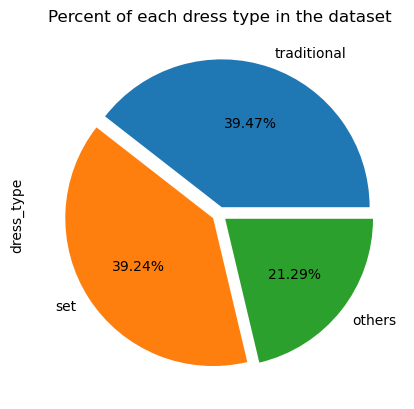

In [80]:
df_statistics["dress_type"].value_counts().plot(kind = "pie", explode = [0.05, 0.05, 0.05,], autopct = "%1.2f%%")
plt.title("Percent of each dress type in the dataset");

this grapgh shows **The percent of apperance of each dress type in the dataset** and it seems that **The traditional and the set have appeard nearly the same**

In [81]:
df_statistics.groupby("dress_type")["amount"].agg(["count", "mean", "max", "min"])

,count,mean,max,min
dress_type,,,,
others,26468,665.138598,2860.0,218.1
set,48784,836.352813,5584.0,357.0
traditional,49078,486.506784,2796.0,199.0


In [82]:
df_statistics.groupby("dress_type")["items_number"].mean()

dress_type
others         1.003363
set            1.002747
traditional    1.004340
Name: items_number, dtype: float64

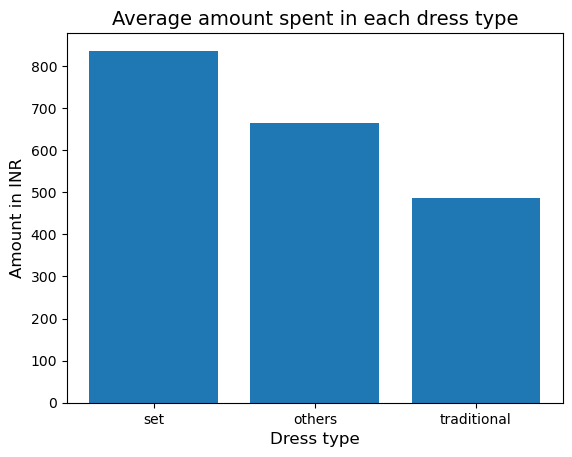

In [83]:
data = df_statistics.groupby("dress_type")["amount"].mean()

plt.bar([1,0,2], data, tick_label = ["others", "set", "traditional"])
plt.title("Average amount spent in each dress type", size = 14)
plt.xlabel("Dress type", size =12)
plt.ylabel("Amount in INR", size =12);

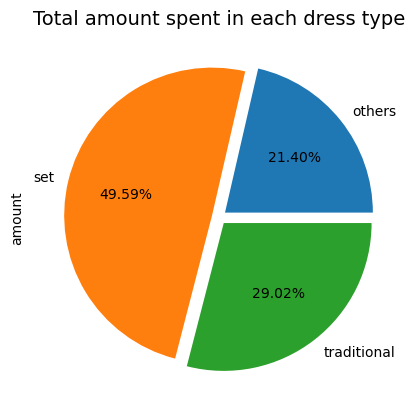

In [84]:
df_statistics.groupby("dress_type")["amount"].sum().plot(kind = "pie", explode = [0.05, 0.05, 0.05], autopct = "%1.2f%%")
plt.title("Total amount spent in each dress type", size = 14);

From thses two graphs we can say that **The set is higher in average and in total amount spent compared to any other dress type** and **There is a big demand on traditional clothes but they are cheep** but this doesn't mean that the set market is more proftiable because **we don't have any information about the cost in any category**

In [85]:
# I want to know who controls the most supply in each category "Amazon" or other merchants
df_statistics.groupby(["dress_type", "fulfilment"])["amount"].count()

dress_type   fulfilment
others       Amazon        16888
             Merchant       9580
set          Amazon        34355
             Merchant      14429
traditional  Amazon        34881
             Merchant      14197
Name: amount, dtype: int64

In [86]:
df_amazon = df_statistics[df_statistics["fulfilment"] == "Amazon"]

In [87]:
df_merchant = df_statistics[df_statistics["fulfilment"] == "Merchant"]

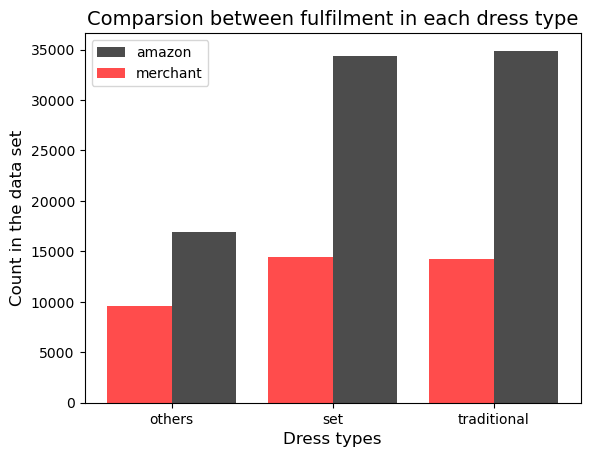

In [88]:
data_merchant = df_merchant.groupby("dress_type")["amount"].count()
data_amazon = df_amazon.groupby("dress_type")["amount"].count()

ind = np.arange(3)
tick_label = ["others", "set", "traditional"]

plt.bar(ind + 0.2, data_amazon, width = 0.4, tick_label = tick_label, label = "amazon", color = "black", alpha = 0.7)
plt.bar(ind - 0.2, data_merchant, width = 0.4, tick_label = tick_label , label = "merchant", color = "red", alpha = 0.7)

plt.title("Comparsion between fulfilment in each dress type", size = 14)
plt.xlabel("Dress types", size = 12)
plt.ylabel("Count in the data set", size = 12)
plt.xticks(ind, tick_label)
plt.legend();

we can see that **Amazon controls most of the supply in each dress type**

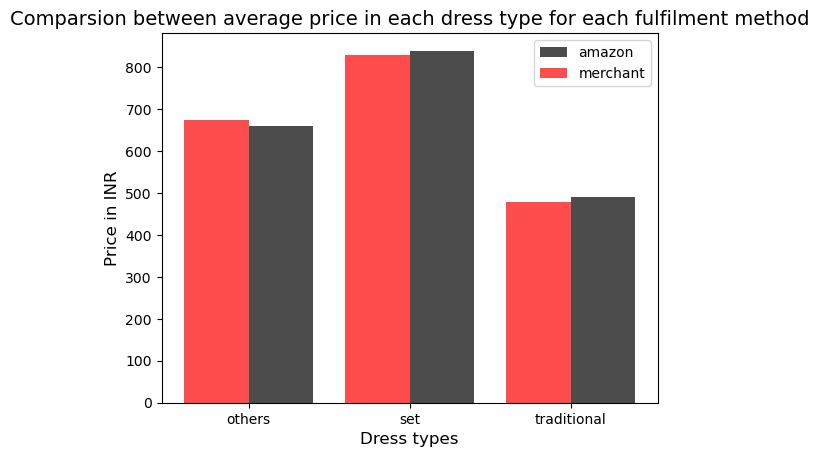

In [89]:
# i want to know if amazon sells with lower prices

data_merchant = df_merchant.groupby("dress_type")["amount"].mean()
data_amazon = df_amazon.groupby("dress_type")["amount"].mean()

ind = np.arange(3)
tick_label = ["others", "set", "traditional"]

plt.bar(ind + 0.2, data_amazon, width = 0.4, tick_label = tick_label, label = "amazon", color = "black", alpha = 0.7)
plt.bar(ind - 0.2, data_merchant, width = 0.4, tick_label = tick_label , label = "merchant", color = "red", alpha = 0.7)

plt.title("Comparsion between average price in each dress type for each fulfilment method", size = 14)
plt.xlabel("Dress types", size = 12)
plt.ylabel("Price in INR", size = 12)
plt.xticks(ind, tick_label)
plt.legend();

I found that **The average price is nearly the same for amazon and merchants so the price is not the reason for amazon to control most of the supply**

***Disclimar***
<br>This dataset doesn't provide us with the enough information to say what is the reason that amazon controls most of the supply

**Now i want to convert the direction of my analysis into cities and see how amnount spent and dress type is affected by each city**

In [90]:
df_statistics

,day,month,shipping_status,fulfilment,shipping_type,dress_type,size,items_number,amount,city,state
0,Saturday,april,cancelled,Merchant,Standard,set,S,1,647.62,MUMBAI,MAHARASHTRA
1,Saturday,april,shipped,Merchant,Standard,traditional,3XL,1,406.00,BENGALURU,KARNATAKA
2,Saturday,april,shipped,Amazon,Expedited,traditional,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA
3,Saturday,april,cancelled,Merchant,Standard,others,L,1,753.33,PUDUCHERRY,PUDUCHERRY
4,Saturday,april,shipped,Amazon,Expedited,others,3XL,1,574.00,CHENNAI,TAMIL NADU
...,...,...,...,...,...,...,...,...,...,...,...
128970,Tuesday,may,shipped,Amazon,Expedited,traditional,XL,1,517.00,HYDERABAD,TELANGANA
128971,Tuesday,may,shipped,Amazon,Expedited,set,M,1,999.00,GURUGRAM,HARYANA
128972,Tuesday,may,shipped,Amazon,Expedited,others,XXL,1,690.00,HYDERABAD,TELANGANA
128973,Tuesday,may,shipped,Amazon,Expedited,set,XS,1,1199.00,Halol,Gujarat


In [91]:
df_statistics["city"].nunique()

8955

In [92]:
df_statistics["state"].nunique()

69

In [93]:
df_statistics["state"].value_counts()

MAHARASHTRA               21528
KARNATAKA                 16216
TAMIL NADU                11012
TELANGANA                 10642
UTTAR PRADESH             10410
                          ...  
Mizoram                       1
rajsthan                      1
Punjab/Mohali/Zirakpur        1
Rajsthan                      1
orissa                        1
Name: state, Length: 69, dtype: int64

We have something wierd in this dataset, in india there are 28 states and 8 unions with a total of 36 enities, but here it says 69 states

The proplem is that **Some values are wriiten in capital litters some are not** So i will try to fix this proplem by changing all the values to lower case letters

## Questions

<br>**- is dress type affected by state**
<br>**- What is the avergae amount in each state**
<br>**- Is there a brefered shipping type in states**
<br>**- Is there a size in each state**

In [94]:
df_statistics["state"].iloc[110]

'TELANGANA'

In [95]:
#This for loop will change all the values to lower case
#and it will take some time, 5 minutes max
start_time = time.time()

error_index_list = []
error_values_list = []

for index in range(len(df_statistics)):
    
    try:
        df_statistics["state"].iloc[index] = df_statistics["state"].iloc[index].lower()
    except:
        error_index_list.append(index)
        error_values_list.append(df_statistics["state"].iloc[index])
        continue
      
    
end_time = time.time()

print("this took {} seconds.".format(end_time - start_time))

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\2186273573.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_statistics["state"].iloc[index] = df_statistics["state"].iloc[index].lower()


this took 209.67559218406677 seconds.


In [104]:
df_statistics["state"].value_counts()

maharashtra               21528
karnataka                 16216
tamil nadu                11012
telangana                 10642
uttar pradesh             10410
                          ...  
punjab/mohali/zirakpur        1
pb                            1
apo                           1
ar                            1
pondicherry                   1
Name: state, Length: 47, dtype: int64

After we made this loop the values are decreased to 47, but they are supposed to be 36, but i see here that some values are wrriten in diffrent ways, for example **"rajshthan" and "rajsthan", another one is "nagaland" some times is wriiten as "nl"**

**I will solve the proplem by making a list of all indian states and a foor loop to iterate over all of them to see what is wrong**

In [99]:
indian_states_list = ["Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh", "Goa", "Gujarat", "Haryana",
                      "Himachal Pradesh", "Jharkhand", "Karnataka", "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur", 
                      "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Punjab", "Rajasthan", "Sikkim", "Tamil Nadu",
                      "Telangana", "Tripura", "Uttar Pradesh", "Uttarakhand", "West Bengal"]

In [100]:
indian_unions_list = ["Andaman & Nicobar", "Chandigarh", "Dadra and Nagar", "Delhi", "Jammu & Kashmir", "Ladakh",
                      "Lakshadweep", "Puducherry"]

In [101]:
#Sinse all the values are lower case letters so i will change the values in these lists

for index in range(len(indian_states_list)):
    indian_states_list[index] = indian_states_list[index].lower()
    
for index in range(len(indian_unions_list)):  
    indian_unions_list[index] = indian_unions_list[index].lower()

In [113]:
# This loop will remove all the extra spaces
# it will take around 6 minutes

start_time = time.time()

for i in range(len(df_statistics)):
    df_statistics["state"].iloc[i] = df_statistics["state"].iloc[i].strip()
    
end_time = time.time()

print("This took {} seconds".format(end_time - start_time))

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\3098451830.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_statistics["state"].iloc[i] = df_statistics["state"].iloc[i].strip()


This took 367.25972056388855 seconds


In [115]:
# I will create a new column to show if this value is valid as a state or uniuon or not
in_or_not_list = []



for index in range(len(df_statistics)):
    if df_statistics["state"].iloc[index] in indian_states_list:
        in_or_not_list.append("state")
    
    elif df_statistics["state"].iloc[index] in indian_unions_list:
        in_or_not_list.append("union")
        
    else:
        in_or_not_list.append("not")


In [116]:
df_statistics["state_union"] = in_or_not_list

In [117]:
df_statistics["state_union"].value_counts()

state    115861
union      8372
not          97
Name: state_union, dtype: int64

In [118]:
index = np.arange(len(df_statistics))

In [119]:
# I'm just updating the index
df_statistics['index'] = index
df_statistics.set_index("index", inplace = True)

In [122]:
df_statistics[df_statistics["state_union"] == "not"]["state"].value_counts()

new delhi                 80
rajshthan                  3
orissa                     3
nl                         2
rj                         2
                          ..
punjab/mohali/zirakpur     1
pb                         1
apo                        1
ar                         1
pondicherry                1
Name: state, Length: 11, dtype: int64

In [123]:
# so will dop these rows and see if this solves the proplem
df_statistics = df_statistics[df_statistics["state_union"] != "not"]

In [124]:
df_statistics["state_union"].value_counts()

state    115861
union      8372
Name: state_union, dtype: int64

In [125]:
df_statistics["state"].value_counts()

maharashtra          21528
karnataka            16216
tamil nadu           11012
telangana            10642
uttar pradesh        10410
                     ...  
arunachal pradesh      145
mizoram                 73
dadra and nagar         70
ladakh                  43
lakshadweep              4
Name: state, Length: 36, dtype: int64

Now we solved the proplem and now we have just 36 values

In [126]:
# I will drop the "state_union" beause i don't need it any more
df_statistics.drop("state_union", axis = 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\1345433180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_statistics.drop("state_union", axis = 1, inplace = True)


Now let's start the analysis 
<br>
**The questions**
<br>**- is dress type affected by state**
<br>**- What is the avergae amount in each state**
<br>**- Is there a brefered shipping type in states**
<br>**- Is there a size in each state**

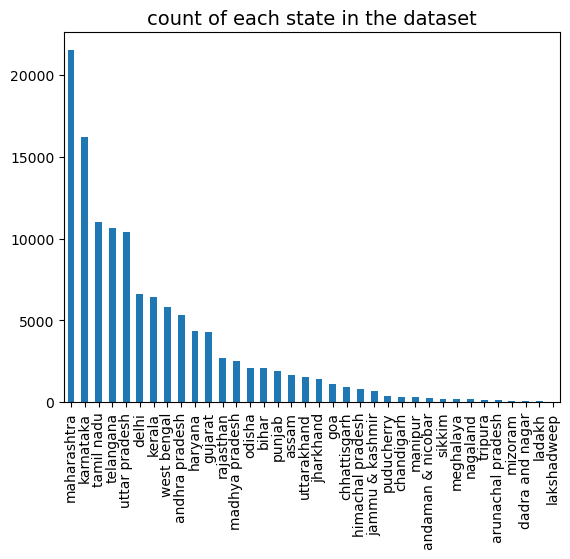

In [127]:
df_statistics["state"].value_counts().plot(kind = "bar")
plt.title("count of each state in the dataset", size = 14)
plt.show()

As we can see here there are some states that almost didn't appeard in the data set.

**In order to compare the total amount spent i will use the top 10 states and the other states i'll group them in "others"**

In [128]:
amount = pd.DataFrame(df_statistics.groupby("state")["amount"].sum())
amount = amount.sort_values(by= ["amount"], ascending=False)
amount

,amount
state,
maharashtra,1.393747e+07
karnataka,1.061154e+07
uttar pradesh,7.274163e+06
telangana,7.040920e+06
tamil nadu,6.797552e+06
...,...
tripura,9.701751e+04
dadra and nagar,4.733692e+04
mizoram,4.175107e+04


In [129]:
# This for loop is going to create a new column that says wither the state is other or not


top_states_list = ["maharashtra", "karnataka", "uttar pradesh", "telangana", "tamil nadu", "delhi", "kerala", "west bengal",
                  "andhra pradesh", "haryana"]

top_state = []

for index in range(len(df_statistics)):
    if df_statistics["state"].iloc[index] in top_states_list:
        state = df_statistics["state"].iloc[index]
        top_state.append(state)
    else:
        top_state.append("others")
        
len(top_state)
len(df_statistics)

124233

In [130]:
df_statistics["top_state"] = top_state

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\979003839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_statistics["top_state"] = top_state


In [131]:
df_statistics["top_state"].value_counts()

others            25916
maharashtra       21528
karnataka         16216
tamil nadu        11012
telangana         10642
                  ...  
delhi              6633
kerala             6420
west bengal        5808
andhra pradesh     5296
haryana            4352
Name: top_state, Length: 11, dtype: int64

In [132]:
df_statistics["amount"].sum()

82220229.78550117

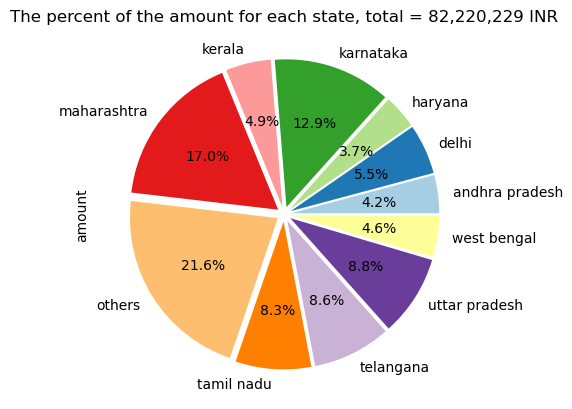

In [133]:
x = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
df_statistics.groupby("top_state")["amount"].sum().plot(kind = "pie", explode = x, autopct = "%1.1f%%", 
                                                        colors = sns.color_palette("Paired") )
plt.title("The percent of the amount for each state, total = 82,220,229 INR");

**The top 10 states forms 78.4% of the total amount**

In [134]:
# To continue my analysis i'll classify the states into regions
# India has 6 regions ["southern", "north_eastern", "eastern", "central", "western", "northern"]

southern_list = ['andhra pradesh',
 'karnataka',
 'kerala',
 'puducherry',
 'tamil nadu',
 'telangana',
 'andaman & nicobar',
 "lakshadweep"]

north_eastern_list = ['arunachal pradesh',
 'assam',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'tripura',
 'sikkim']

eastern_list = ['bihar', 'jharkhand', 'odisha', 'west bengal']

central_list = ['chhattisgarh', 'madhya pradesh', 'uttar pradesh', 'uttarakhand']

western_list = ['goa', 'gujarat', 'maharashtra', 'dadra and nagar']

northern_list = ['chandigarh',
 'delhi',
 'haryana',
 'himachal pradesh',
 'jammu & kashmir',
 'punjab',
 'rajasthan',
 'ladakh']

In [135]:
# This loop is going to classify the states into regions

region_list = []
error_list = []
for index in range(len(df_statistics)):
    
    if df_statistics["state"].iloc[index] in southern_list:
        region_list.append("southern")
    
    elif df_statistics["state"].iloc[index] in north_eastern_list:
        region_list.append("north eastern")
        
    elif df_statistics["state"].iloc[index] in eastern_list:
        region_list.append("eastern")
        
    elif df_statistics["state"].iloc[index] in central_list:
        region_list.append("central")
        
    elif df_statistics["state"].iloc[index] in western_list:
        region_list.append("western")
        
    elif df_statistics["state"].iloc[index] in northern_list:
        region_list.append("northern")
        
    else:
        region_list.append("error")
        error_list.append(df_statistics.iloc[index])
        
df_statistics["region"] = region_list

C:\Users\HP\AppData\Local\Temp\ipykernel_5644\4084583198.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_statistics["region"] = region_list


In [136]:
df_statistics["region"].value_counts()

southern         50188
western          27014
northern         17379
central          15328
eastern          11420
north eastern     2904
Name: region, dtype: int64

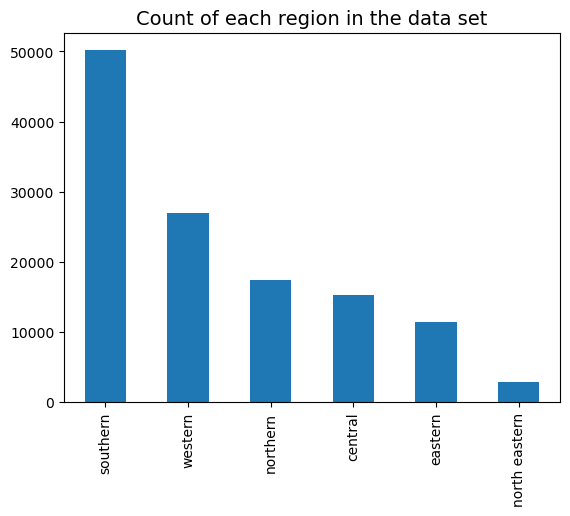

In [137]:
df_statistics["region"].value_counts().plot(kind = "bar")
plt.title("Count of each region in the data set", size = 14);

In [139]:
# To make my analysis based on dress type and region i'll need to split the values of the dress_types alone

df_traditonal = df_statistics[df_statistics["dress_type"] == "traditional"]
df_set = df_statistics[df_statistics["dress_type"] == "set"]
df_others = df_statistics[df_statistics["dress_type"] == "others"]

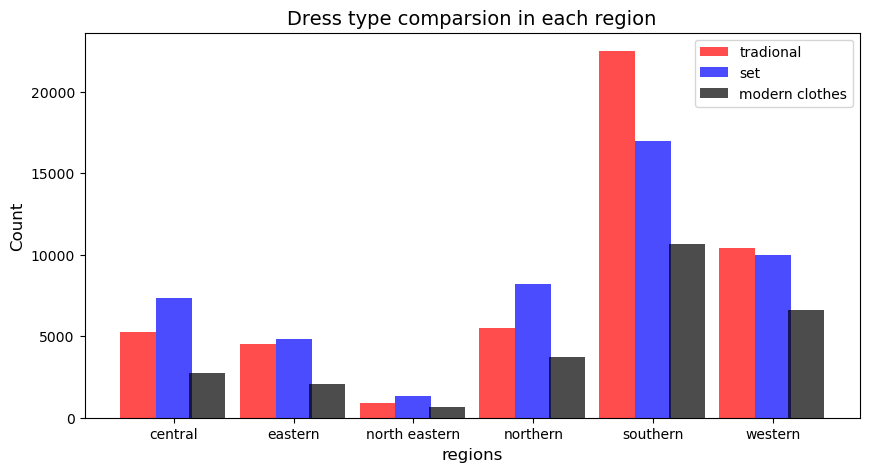

In [140]:
data_traditional = df_traditonal.groupby("region")["amount"].count()
data_set = df_set.groupby("region")["amount"].count()
data_others = df_others.groupby("region")["amount"].count()

ind = np.arange(6)
labels = ["central", "eastern", "north eastern", "northern", "southern", "western"]

plt.figure(figsize=(10,5))
           
plt.bar(ind - 0.15, data_traditional, width = 0.3, tick_label = labels, label = "tradional", color = "red", alpha = 0.7)
plt.bar(ind + 0.15, data_set, width = 0.3, tick_label = labels, label = "set", color = "blue", alpha = 0.7)
plt.bar(ind + 0.43, data_others,  width = 0.3, tick_label = labels, label = "modern clothes", color = "black", alpha = 0.7)

plt.title("Dress type comparsion in each region", size = 14)
plt.xlabel("regions", size = 12)
plt.ylabel("Count", size = 12)

plt.legend()
plt.xticks(ind + 0.15, labels);

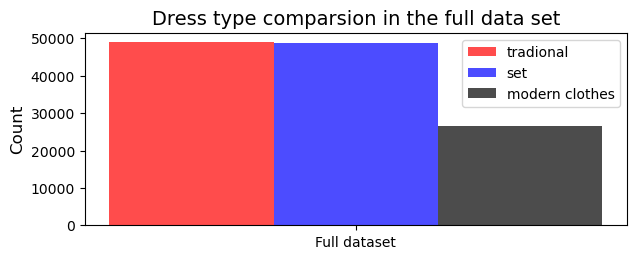

In [141]:
data_traditional = df_traditonal["dress_type"].value_counts()
data_set = df_set["dress_type"].value_counts()
data_others = df_others["dress_type"].value_counts()

ind = np.arange(1)
labels = ["Full dataset"]

plt.figure(figsize=(7,2.5))

plt.bar(ind - 0.1, data_traditional, width = 0.1, tick_label = labels, label = "tradional", color = "red", alpha = 0.7)
plt.bar(ind, data_set, width = 0.1, tick_label = labels, label = "set", color = "blue", alpha = 0.7)
plt.bar(ind + 0.1, data_others,  width = 0.1, tick_label = labels, label = "modern clothes", color = "black", alpha = 0.7)


plt.title("Dress type comparsion in the full data set", size = 14)
plt.ylabel("Count", size = 12)

plt.xticks(ind, labels)
plt.legend();

Form the distripution in the full datasets we can see that **Tradiotional and set are nearly equal but modern clothes are less** and we can see in the region comparision graph **That the southern region shows higher orders in the tradional compared to the other types and the central and northern showas higher sets orders, and the other regions are near to the full data set with the traditional and sets nearly equal and modern clothes so low**

In [144]:
df.head()

,date,day,month,shipping_status,fulfilment,shipping_type,category,size,items_number,amount,city,state,B2B
0,2022-04-30,Saturday,april,cancelled,Merchant,Standard,Set,S,1,647.62,MUMBAI,MAHARASHTRA,False
1,2022-04-30,Saturday,april,shipped,Merchant,Standard,kurta,3XL,1,406.00,BENGALURU,KARNATAKA,False
2,2022-04-30,Saturday,april,shipped,Amazon,Expedited,kurta,XL,1,329.00,NAVI MUMBAI,MAHARASHTRA,True
3,2022-04-30,Saturday,april,cancelled,Merchant,Standard,Western Dress,L,1,753.33,PUDUCHERRY,PUDUCHERRY,False
4,2022-04-30,Saturday,april,shipped,Amazon,Expedited,Top,3XL,1,574.00,CHENNAI,TAMIL NADU,False
